In [85]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from torchvision import models
from netlens.modules import FlatModel
from netlens.data import *
from netlens.image_proc import *
from netlens.visualization import OptVis, ImageParam

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
IMAGE_PATH = '../../images/examples/'

In [78]:
torch.__version__

'1.3.1'

In [79]:
network = models.vgg11(pretrained=True)
network.to('cuda' if torch.cuda.is_available() else 'cpu');

In [80]:
network

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [81]:
model = FlatModel.from_nested_cnn(network)

In [82]:
model.summary()

  IDX | KEY                       | LAYER
--------------------------------------------------------------------------------
    0 | features-conv-0           | Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    1 | features-relu-0           | ReLU()
    2 | features-pool-0           | MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    3 | features-conv-1           | Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    4 | features-relu-1           | ReLU()
    5 | features-pool-1           | MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    6 | features-conv-2           | Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    7 | features-relu-2           | ReLU()
    8 | features-conv-3           | Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    9 | features-relu-3           | ReLU()
   10 | features-pool-2           | MaxPool2d(kernel_size=2, stride=2, 

## Class Visualisations

First we generate visualisations of the classes. To change the class selected, simply change the value of `neuron`.

We parameterise the input noise in the colour decorrelated, Fourier domain. This helps create better visualisations. For more, see: https://distill.pub/2017/feature-visualization/

In [99]:
# Select a layer from the network
layer = 'classifier-linear-2'
neuron = 360

# Create an OptVis object from a PyTorch model
optvis = OptVis.from_activations(model, layer=layer, neuron=neuron, 
                                 optim_params={'lr': 0.05, 'weight_decay': 5.0})

For layer classifier-linear-2, class 360: otter
Run [50], loss=-210.3138
Run [100], loss=-226.5964
Run [150], loss=-223.0300
Run [200], loss=-229.8493
Run [250], loss=-272.3619


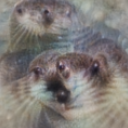

Run [300], loss=-271.6298
Run [350], loss=-219.7497
Run [400], loss=-250.6718
Run [450], loss=-242.3227
Run [500], loss=-249.2301


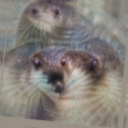

In [100]:
# Parameterise input noise in colour decorrelated Fourier domain
img_param = ImageParam(size=128, fft=True, decorrelate=True)

# Create visualisation
print(f'For layer {layer}, class {neuron}: {IMAGENET_LABELS[neuron]}')
output = optvis.vis(img_param, thresh=(250, 500), transform=True, verbose=True, show=True)

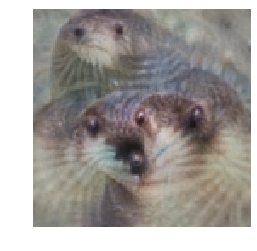

In [101]:
show_image(output)

## Channel Visualisations

Now let's generate some visualisations of the channels of the convolutional layers of the network. We can see the names and number of channels of each layer by using the `get_layer_names()` method. We can then generate channel visualisations in the same way.

In [89]:
# Select a layer from the network
layer = 'features-conv-6'

# Choose a channel that is within the size of the layer
channel = 32

# Create an OptVis object from a PyTorch model
optvis = OptVis.from_activations(model, layer=layer, channel=channel, shortcut=True,
                                 optim_params={'lr': 0.05, 'weight_decay': 0.03})

Run [50], loss=-26.9493
Run [100], loss=-34.9258
Run [150], loss=-39.5321
Run [200], loss=-38.2752
Run [250], loss=-38.1204


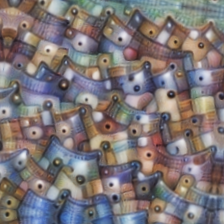

Run [300], loss=-39.6787
Run [350], loss=-42.3847
Run [400], loss=-39.4458
Run [450], loss=-40.3369
Run [500], loss=-52.5935


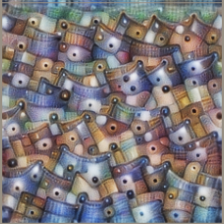

In [90]:
# Parameterise input noise in colour decorrelated Fourier domain
img_param = ImageParam(size=224, fft=True, decorrelate=True)

# Create visualisation
output = optvis.vis(img_param, thresh=(250, 500), transform=True, verbose=True, show=True)

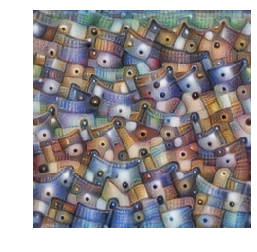

In [91]:
show_image(output)